In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline

In [2]:
n = 150
cov_nercome = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_nercome_{n}.matrix")
cov_sample = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_sample_{n}.matrix")

# 'Real' covariance matrix before processing.
# The term 'real' here indicates that this is the matrix that we use to compare
# our estimates to.
cov_real_preproc = np.loadtxt("../data/C_2048_BOSS_DR12_NGC_z1_V6C_1_1_1_1_1_10_200_200_prerecon.matrix")

In [3]:
print(cov_nercome)
print(cov_sample)

[[ 2.27832551e+08  2.59907242e+07  6.73776152e+06 ... -7.84954904e+04
  -1.15439253e+05  1.24771390e+05]
 [ 2.59907242e+07  6.06785853e+07  7.69837235e+06 ...  2.53585740e+04
  -3.93506196e+04 -4.50817127e+04]
 [ 6.73776152e+06  7.69837235e+06  1.81131636e+07 ...  4.44772299e+03
   2.11842481e+04  2.62460127e+04]
 ...
 [-7.84954904e+04  2.53585740e+04  4.44772299e+03 ...  1.41918668e+04
   3.06675689e+03  1.09158584e+03]
 [-1.15439253e+05 -3.93506196e+04  2.11842481e+04 ...  3.06675689e+03
   1.24796161e+04  1.81080818e+03]
 [ 1.24771390e+05 -4.50817127e+04  2.62460127e+04 ...  1.09158584e+03
   1.81080818e+03  1.19563349e+04]]
[[ 2.26448673e+08  2.51469849e+07  7.18273716e+06 ... -7.75041515e+04
  -1.13900600e+05  1.26052155e+05]
 [ 2.51469849e+07  5.28564074e+07  6.82523862e+06 ...  2.68802920e+04
  -3.12140462e+04 -3.93564942e+04]
 [ 7.18273716e+06  6.82523862e+06  1.57038570e+07 ...  1.66925887e+03
   1.59044295e+04  2.22630813e+04]
 ...
 [-7.75041515e+04  2.68802920e+04  1.6692588

In [4]:
indices = np.concatenate((np.arange(40), np.arange(40)+80, np.arange(40)+160))
cov_real = (cov_real_preproc[indices, :])[:, indices]

In [5]:
print(cov_real)

[[ 2.39531896e+08  1.91051563e+07  1.44038639e+05 ...  9.68083967e+03
  -1.21684291e+04  2.21567909e+04]
 [ 1.91051563e+07  5.15256710e+07  4.78376836e+06 ...  9.13608077e+03
   9.26311893e+03 -1.41639754e+04]
 [ 1.44038639e+05  4.78376836e+06  1.67772970e+07 ... -5.49127765e+02
  -2.28200815e+03  6.76773412e+03]
 ...
 [ 9.68083967e+03  9.13608077e+03 -5.49127765e+02 ...  4.22979902e+03
   1.28931823e+03  3.78440184e+02]
 [-1.21684291e+04  9.26311893e+03 -2.28200815e+03 ...  1.28931823e+03
   3.88691287e+03  1.00320951e+03]
 [ 2.21567909e+04 -1.41639754e+04  6.76773412e+03 ...  3.78440184e+02
   1.00320951e+03  3.62984716e+03]]


In [6]:
MSE_NERCOME = np.trace((cov_nercome-cov_real)@(cov_nercome-cov_real).T)
MSE_sample = np.trace((cov_sample-cov_real)@(cov_sample-cov_real).T)
print(f"MSE NERCOME: {MSE_NERCOME}")
print(f"MSE sample: {MSE_sample}")

MSE NERCOME: 1.814405751041976e+16
MSE sample: 2.2095425401403372e+16


In [7]:
evals_nercome = np.linalg.eigvalsh(cov_nercome)
evals_sample = np.linalg.eigvalsh(cov_sample)
evals_real = np.linalg.eigvalsh(cov_real)

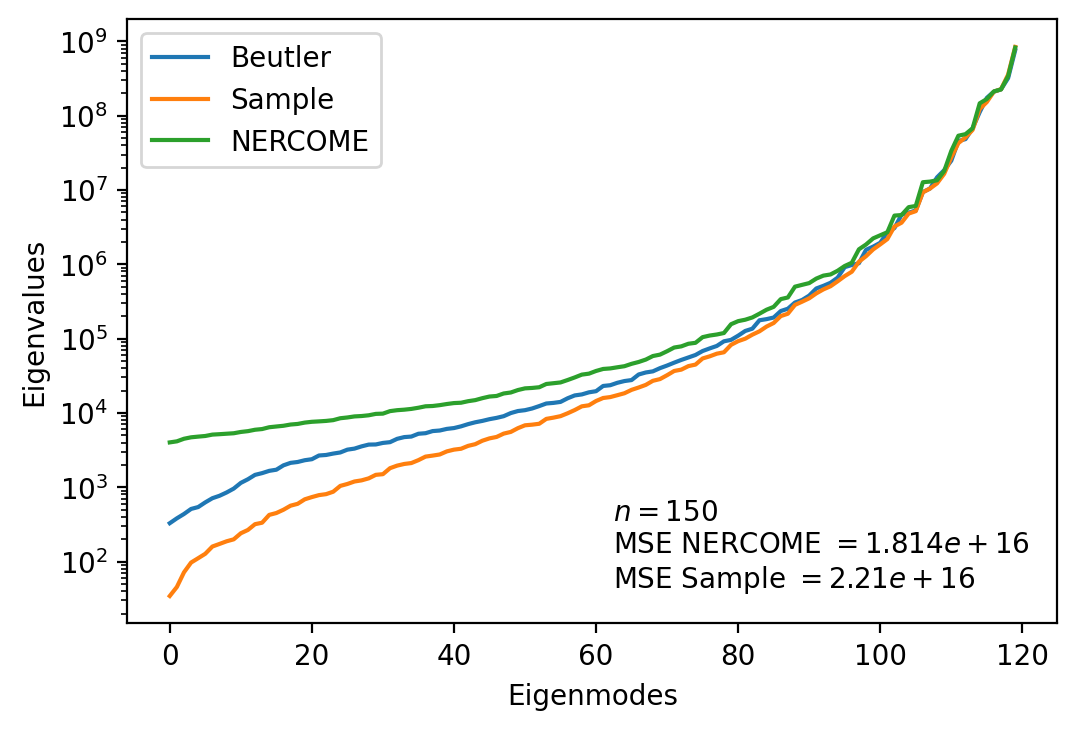

In [8]:
plt.figure(dpi=200)
plt.plot(evals_real, label="Beutler")
plt.plot(evals_sample, label="Sample")
plt.plot(evals_nercome, label="NERCOME")
plt.yscale("log")
plt.legend()
plt.xlabel("Eigenmodes")
plt.ylabel("Eigenvalues")

parameters = AnchoredText(
    fr"$n = {n}$" "\n"
    fr"MSE NERCOME $= {np.format_float_scientific(MSE_NERCOME, precision=3)}$" "\n"
    fr"MSE Sample $={np.format_float_scientific(MSE_sample, precision=3)}$",
    frameon=False, loc="lower right", pad=0.5)
plt.setp(parameters.patch, facecolor='white', alpha=0.5)
plt.gca().add_artist(parameters)

In [9]:
nercome_rel_errors = (cov_nercome-cov_real)/np.abs(cov_real)
print(nercome_rel_errors)

[[-0.04884254  0.36040364 45.77745908 ... -9.10833493 -8.48678353
   4.63129338]
 [ 0.36040364  0.17763795  0.60926947 ...  1.77565124 -5.24809612
  -2.1828432 ]
 [45.77745908  0.60926947  0.07962347 ...  9.0996141  10.2831606
   2.87810932]
 ...
 [-9.10833493  1.77565124  9.0996141  ...  2.35521068  1.37858801
   1.88443428]
 [-8.48678353 -5.24809612 10.2831606  ...  1.37858801  2.21067554
   0.80501496]
 [ 4.63129338 -2.1828432   2.87810932 ...  1.88443428  0.80501496
   2.29389487]]


In [10]:
nercome_pos_count = 0
nercome_neg_count = 0
for row in nercome_rel_errors:
    for error in row:
        if error >= 0:
            nercome_pos_count += 1
        elif error < 0:
            nercome_neg_count += 1

print(f"NERCOME overestimated {nercome_pos_count} elements")
print(f"NERCOME underestimated {nercome_neg_count} elements")

index_max_nercome = np.unravel_index(np.abs(nercome_rel_errors).argmax(), nercome_rel_errors.shape)

print(f"Maximum relative error is {nercome_rel_errors[index_max_nercome]}")
print(f"Maximum relative error index is {index_max_nercome}")
print(f"NERCOME: {cov_nercome[index_max_nercome]}, real: {cov_real[index_max_nercome]}")

NERCOME overestimated 7732 elements
NERCOME underestimated 6668 elements
Maximum relative error is -14867.093785359417
Maximum relative error index is (25, 116)
NERCOME: -1330.1943683149816, real: -0.08946636922783076


In [11]:
sample_rel_errors = (cov_sample-cov_real)/np.abs(cov_real)
print(sample_rel_errors)

[[-5.46199632e-02  3.16240733e-01  4.88667388e+01 ... -9.00593276e+00
  -8.36033718e+00  4.68909798e+00]
 [ 3.16240733e-01  2.58266676e-02  4.26749396e-01 ...  1.94221260e+00
  -4.36971234e+00 -1.77863334e+00]
 [ 4.88667388e+01  4.26749396e-01 -6.39817026e-02 ...  4.03983695e+00
   7.96948846e+00  2.28959159e+00]
 ...
 [-9.00593276e+00  1.94221260e+00  4.03983695e+00 ...  1.71827165e-03
   3.00255269e-01  5.42140600e-01]
 [-8.36033718e+00 -4.36971234e+00  7.96948846e+00 ...  3.00255269e-01
  -1.16153477e-01 -6.25623934e-02]
 [ 4.68909798e+00 -1.77863334e+00  2.28959159e+00 ...  5.42140600e-01
  -6.25623934e-02 -1.45501932e-01]]


In [12]:
sample_pos_count = 0
sample_neg_count = 0
for row in sample_rel_errors:
    for error in row:
        if error >= 0:
            sample_pos_count += 1
        elif error < 0:
            sample_neg_count += 1

print(f"Sample overestimated {sample_pos_count} elements")
print(f"Sample underestimated {sample_neg_count} elements")

index_max_sample = np.unravel_index(np.abs(sample_rel_errors).argmax(), sample_rel_errors.shape)

print(f"Maximum relative error is {sample_rel_errors[index_max_sample]}")
print(f"Maximum relative error index is {index_max_sample}")
print(f"Sample: {cov_sample[index_max_sample]}, real: {cov_real[index_max_sample]}")

Sample overestimated 6967 elements
Sample underestimated 7433 elements
Maximum relative error is -6982.780995557238
Maximum relative error index is (25, 116)
Sample: -624.8135291548314, real: -0.08946636922783076
